## 本教程学习，如何通过librosa音频文件的基本操作
---
制作者： [__梁新彦__ ](https://xinyanliang.github.io)

山西大学__大数据科学与产业研究院__

E_mail： liangxinyan48@163.com

时间：2018/1/6

---
1. 导入用到的包
2. 读入音频文件
3. 画波形图
4. 画mel频谱图
5. 画log_mel 频谱图
6. 提取五种特征mfcc，chroms，mel，contrast，tonnetz
7. 将6.中得到的五种特征拼接在一起形成最终的音频特征


[librosa](http://librosa.github.io/librosa/)

In [1]:
%matplotlib inline
#encoding=utf-8

### 1.  导入用到的包

In [2]:
import librosa
import numpy as np
import os

### 2.  通过librosa.load()方法导入音频文件，返回两个参数x和sr。

> x：原始音频信号，一位数组

> sr：音频的采样频率

In [3]:
audio_path = os.path.join('data','a.wav')
x,sr = librosa.load(audio_path)

print('a.wav音频有_%d_个样本点'%(x.shape))
print('a.wav音频的采样率为：',sr)

a.wav音频有_120384_个样本点
a.wav音频的采样率为： 22050


### 3. 画a.wav音频的波形图


|英语|汉语|
|:-----|:----|
|wave |波|
|amplitude |振幅|

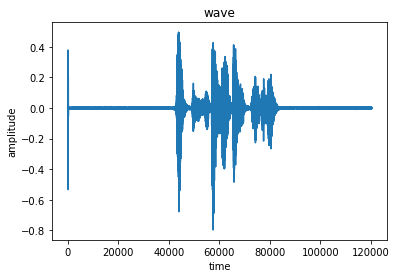

In [4]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.title('wave')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

### 4.  画mel频谱图

#### 使用函数 librosa.feature.melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, power=2.0, **kwargs)

> 常用参数解释：

> y: 使用librosa.load()的返回值，即前面的x

> n_fft: 傅立叶变化的窗口大小

> hop_lengh: 傅立叶变换使用窗口的移动步长

> n_mels: 每个窗口内的样本点，转化为梅尔系数个数,默认128


In [5]:
mel = librosa.feature.melspectrogram(y=x,n_mels = 64)
print('mel谱的大小为：',mel.shape)


mel谱的大小为： (64, 236)


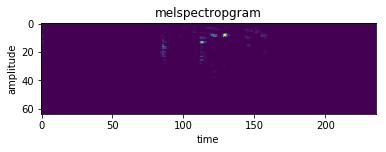

In [6]:
plt.imshow(mel)
plt.title('melspectropgram')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

### 5. 将y轴取对数，就得到了__log_melspectrogram__,事实上他们的区别就是单位不一样，取log后就是我们常说的表示声音强度的单位分贝db

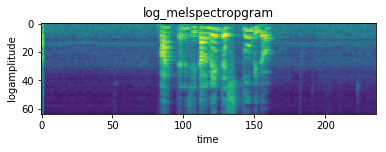

In [7]:
log_mel = librosa.logamplitude(mel)
plt.imshow(log_mel)
plt.title('log_melspectropgram')
plt.xlabel('time')
plt.ylabel('logamplitude')
plt.show()

### 6. 提取五种特征mfcc，chroms，mel，contrast，tonnetz

#### (1) 通过librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, **kwargs),提取mfcc特征
只需关注y和n_mfcc两个参数即可

> y: librosa.load()的返回值

> n_mfcc: 梅尔倒谱系数个数

In [8]:
mfcc = librosa.feature.mfcc(y=x,n_mfcc=40)
print('提取的mfcc特征大小为：',mfcc.shape)

提取的mfcc特征大小为： (40, 236)


In [9]:
import numpy as np
mfcc = np.mean(mfcc,axis=1)
print('提取的平均mfcc特征个数为：',len(mfcc))

提取的平均mfcc特征个数为： 40


#### （2）通过 librosa.feature.chroma_stft(y=None, sr=22050, S=None, norm=inf, n_fft=2048, hop_length=512, tuning=None, **kwargs) 提取chroma

> y: 同上

> n_chroma: 类似于n_mels及n_mfccs,默认12

In [10]:
chroma = librosa.feature.chroma_stft(y=x,n_chroma=12)
print('提取的chroma特征大小为',chroma.shape)

提取的chroma特征大小为 (12, 236)


In [11]:
chroma = np.mean(chroma,axis=1)
print('提取的平均chroma特征个数为：',len(chroma))

提取的平均chroma特征个数为： 12


#### （3）通过librosa.feature.melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, power=2.0, **kwargs)提取mel特征，解释同上。

In [12]:
mel = librosa.feature.melspectrogram(y=x, n_mels = 128)
print('提取的mel特征大小为',mel.shape)

提取的mel特征大小为 (128, 236)


In [13]:
mel = np.mean(mel,axis=1)
print('提取的平均mel特征个数为：',len(mel))

提取的平均mel特征个数为： 128


#### （4）通过librosa.feature.spectral_contrast(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, freq=None, fmin=200.0, n_bands=6, quantile=0.02, linear=False)提取contrast特征

> n_bands: 类似于n_mels

In [14]:
contrast = librosa.feature.spectral_contrast(y=x, n_bands=6)
print('提取的contrast特征大小为',contrast.shape)

提取的contrast特征大小为 (7, 236)


In [15]:
contrast = np.mean(contrast,axis = 1)
print('提取的平均contrast特征个数为：',len(contrast))

提取的平均contrast特征个数为： 7


#### (5) 通过librosa.feature.tonnetz(y=None, sr=22050, chroma=None)提取toonetz特征.只需关注y参数就好

In [16]:
tonnetz = librosa.feature.tonnetz(y=x)
print('提取的tonnetz特征大小为',tonnetz.shape)

提取的tonnetz特征大小为 (6, 236)


In [17]:
tonnetz = np.mean(tonnetz,axis=1)
print('提取的tonnetz特征大小为',len(tonnetz))

提取的tonnetz特征大小为 6


### 7. 将6.中得到的五种特征拼接在一起形成a.wav最终的特征

In [18]:
x_feature = np.hstack([mfcc,chroma,mel,contrast,tonnetz])
print('最终的音频特征长度为：',len(x_feature))

最终的音频特征长度为： 193
